In [348]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Para la Visualizacion 
# -----------------------------------------------------------------------
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Para los modelos
# -----------------------------------------------------------------------
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Importar librerías de PyCaret con alias representativos
import pycaret.classification as pc_classification

# import pycaret.clustering as *    esto es si solo quiero hacer un solo tipo de modelo para que me importe todo porque si quiero hacer más, setup no sabe a que modelo me refiero

# Importar métricas de evaluación directamente
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Para la codificación de las variables categóricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder 
from category_encoders import TargetEncoder  

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

import os
import sys 

import warnings
warnings.filterwarnings("ignore")

sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento as b

pd.set_option("display.max_columns", None)


In [349]:
df_sin_outpequeñas= pd.read_pickle("../datos/EF/Datos_modelos/pequeñas_sin_outliers.pkl")
df_sin_outmedianas= pd.read_pickle("../datos/EF/Datos_modelos/medianas_sin_outliers.pkl")
df_sin_outamplias= pd.read_pickle("../datos/EF/Datos_modelos/amplias_sin_outliers.pkl")
df_sin_outgrandes= pd.read_pickle("../datos/EF/Datos_modelos/grandes_sin_outliers.pkl")

# **VIVIENDAS PEQUEÑAS**

In [350]:
df_sin_outpequeñas.head()

,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,Álava,Municipio_pequeño,De 50.000 habitantes o menos,70.450557,Junio,2021,Si,Si,4,Propia por herencia o donación,Desconocido,individual,Petróleo o derivados,abastecimiento público,Si,Si,No,No,No,Si,Si,No,No,Si,Si,Si,1,1,3,2,0,Entre 31 y 45 m2,1,Si,No,Si,Si,No,No,Si,servicio doméstico interno,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,No,Si,No,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 500€ a menos de 1.000€,Unifamiliar,Vivienda unifamiliar,2,1,De 1941 a 1950,bueno,No es accesible,No,Si,1,No,Si,Si,Alcantarillado,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,0
1,Álava,Municipio_pequeño,De 50.000 habitantes o menos,51.333499,Mayo,2021,Si,Si,5,Alquilada,De 400€ a menos de 500€,individual,Gas butano o propano,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,No,Si,Si,No,1,0,3,0,1,Entre 31 y 45 m2,0,Si,Si,Si,No,No,Si,No,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,Si,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 500€ a menos de 1.000€,Multifamiliar,Edificio con 10 o más viviendas,3,3,De 1971 a 1980,bueno,Es accesible,Si,No,No tiene garaje,Si,Si,Si,Alcantarillado,3,No tiene vehiculo,no tiene renovable,banda estrecha,País Vasco,6200,IBI,2147,4.2,0
2,Álava,Municipio_pequeño,De 50.000 habitantes o menos,88.378354,Junio,2021,Si,No,1,Alquilada,De 100€ a menos de 200€,No tiene calefacción,Desconocido,abastecimiento público,Si,Si,No,Si,No,Si,Si,No,No,No,Si,No,1,1,1,0,0,Hasta 30 m2,0,Si,Si,Si,No,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,Si,No,No,No,No,No,No,No,Si,Si,No,No,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 500€ a menos de 1.000€,Multifamiliar,Edificio de 3 a 9 viviendas,3,0,De 1961 a 1970,moderadamente mejorable,No es accesible,No,No,No tiene garaje,No,No,Si,Alcantarillado,2,No tiene vehiculo,no tiene renovable,Sin internet,País Vasco,6200,IBI,2147,4.2,0
3,Álava,Municipio_pequeño,De 50.000 habitantes o menos,99.561827,Mayo,2021,Si,Si,2,Alquilada,De 100€ a menos de 200€,individual,Electricidad,abastecimiento público,Si,Si,Si,No,No,No,Si,No,Si,Si,Si,Si,1,1,1,0,0,Entre 31 y 45 m2,0,Si,Si,Si,Si,Si,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,Si,No,Si,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,Menos de 500€,Multifamiliar,Edificio de 3 a 9 viviendas,2,0,De 1961 a 1970,perfecto,No es accesible,No,No,No tiene garaje,No,No,Si,Alcantarillado,1,No tiene vehiculo,no tiene renovable,banda ancha fija,País Vasco,6200,IBI,2147,4.2,0
4,Álava,Municipio_pequeño,De 50.000 habitantes o menos,60.037846,Julio,2021,Si,No,1,Propia por compra totalmente pagada,Desconocido,No tiene calefacción,Desconocido,abastecimiento público,Si,Si,No,No,No,Si,Si,No,No,No,No,No,1,1,2,0,0,Entre 31 y 45 m2,1,Si,Si,No,No,No,Si,No,No dispone de servicio doméstico,No dis

### Filtramos las columnas máximas con las que vamos a poder crear un modelo que nos valga teniendo en cuenta los datos de los que disponemos (los de Red Piso)

In [351]:
df_sin_outpequeñas.columns

Index(['idq_pv', 'idq_mun', 'tam_muni', 'factor', 'mesent', 'anoent', 'yoresi',
       'otroresi', 'nresi', 'regvi', 'pagovi', 'calefac', 'tipocombcale',
       'tipoagua', 'wc', 'boducha', 'aireacond', 'aislam', 'adaptada',
       'cocina', 'lavadora', 'lavavajillas', 'secadora', 'horno', 'microondas',
       'vitroinduc', 'naseos', 'nsalones', 'ndormito', 'nsototrast',
       'notrashabit', 'metrosvi', 'nvehiculos', 'papel', 'vidrio', 'envases',
       'organico', 'halogena', 'bajoconsumo', 'led', 'servdomes', 'ayudaext',
       'ruidos', 'contamin', 'sucio', 'malcomunic', 'pocoverde',
       'delincuencia', 'molesturist', 'colegio', 'csalud', 'super', 'farmacia',
       'bares', 'cambioresi', 'segunresi', 'lugsegunresi', 'otraccaa',
       'otropais', 'diasusa', 'ingrehog', 'tipoedif', 'tipoedifviv',
       'nplantassob', 'nplantasbajo', 'annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'gastuberia',
       'aguacalcent', 'evacuaguares', 'tipoe

In [352]:
df_sin_outpequeñas_fil=df_sin_outpequeñas[['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif','annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'aguacalcent', 'ccaa', 'ayudas_ccaa',
       'bonificaciones', 'horas_de_sol', 'radiacion_solar', 'erfotov']]

In [353]:
df_sin_outpequeñas_fil.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,Álava,individual,1,3,Entre 31 y 45 m2,Unifamiliar,De 1941 a 1950,bueno,No es accesible,No,Si,1,Si,País Vasco,4800,IBI,2147,4.2,0
1,Álava,individual,1,3,Entre 31 y 45 m2,Multifamiliar,De 1971 a 1980,bueno,Es accesible,Si,No,No tiene garaje,Si,País Vasco,6200,IBI,2147,4.2,0


In [354]:
columnas_categoricas=df_sin_outpequeñas_fil.select_dtypes(include=['object', 'category']).columns

In [355]:
columnas_categoricas

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif',
       'annoedifinterv', 'estadoedif', 'accesoedif', 'ascensor', 'garaje',
       'nplazasgar', 'aguacalcent', 'ccaa', 'bonificaciones'],
      dtype='object')

**AHORA HACIENDO EL ENCODING Y TRATANDO EL DESBALANCEO**

In [356]:
b.detectar_orden_cat(df_sin_outpequeñas_fil, columnas_categoricas,"erfotov")

Estamos evaluando el orden de la variable IDQ_PV


erfotov,0,1
idq_pv,,
A Coruña,80,0
Albacete,21,1
Alicante,146,1
Almería,40,0
Asturias,156,3
Badajoz,36,2
Baleares,162,6
Barcelona,431,11
Burgos,27,1


La variable idq_pv NO tiene orden porque su p-valor es : 0.29416154026694097
Estamos evaluando el orden de la variable CALEFAC


erfotov,0,1
calefac,,
No pero sí aparato que permite calentar alguna habitación (por ejemplo radiadores eléctricos),1145,13
No tiene calefacción,1749,38
colectiva,274,11
individual,1349,20


La variable calefac SI tiene orden porque su p-valor es : 0.0076736053628849955
Estamos evaluando el orden de la variable NASEOS


erfotov,0,1
naseos,,
0,37,8
1,4102,64
2,346,10
3,32,0


La variable naseos SI tiene orden porque su p-valor es : 4.462804796076205e-15
Estamos evaluando el orden de la variable NDORMITO


erfotov,0,1
ndormito,,
0,197,4
1,2063,39
2,1485,24
3,665,11
4,93,4
5,14,0


La variable ndormito NO tiene orden porque su p-valor es : 0.5764698187751032
Estamos evaluando el orden de la variable METROSVI


erfotov,0,1
metrosvi,,
Entre 31 y 45 m2,3620,58
Hasta 30 m2,897,24


La variable metrosvi SI tiene orden porque su p-valor es : 0.048729866087545884
Estamos evaluando el orden de la variable TIPOEDIF


erfotov,0,1
tipoedif,,
Multifamiliar,3440,47
Unifamiliar,1077,35


La variable tipoedif SI tiene orden porque su p-valor es : 0.00013420196987277297
Estamos evaluando el orden de la variable ANNOEDIFINTERV


erfotov,0,1
annoedifinterv,,
Anterior a 1900,231,6
De 1900 a 1920,153,2
De 1921 a 1940,190,0
De 1941 a 1950,198,1
De 1951 a 1960,401,4
De 1961 a 1970,643,5
De 1971 a 1980,629,14
De 1981 a 1990,514,10
De 1991 a 2000,618,11


La variable annoedifinterv SI tiene orden porque su p-valor es : 0.007415708681274058
Estamos evaluando el orden de la variable ESTADOEDIF


erfotov,0,1
estadoedif,,
bueno,921,9
casi inhabitable,47,2
casi perfecto,429,13
inhabitable,54,2
levemente mejorable,591,11
mejorable,122,4
moderadamente bueno,578,10
moderadamente mejorable,202,4
muy bueno,1037,18


La variable estadoedif NO tiene orden porque su p-valor es : 0.3596849198243933
Estamos evaluando el orden de la variable ACCESOEDIF


erfotov,0,1
accesoedif,,
Es accesible,2516,49
No es accesible,2001,33


La variable accesoedif NO tiene orden porque su p-valor es : 0.534856138657124
Estamos evaluando el orden de la variable ASCENSOR


erfotov,0,1
ascensor,,
No,2700,39
Si,1817,43


La variable ascensor SI tiene orden porque su p-valor es : 0.034027399346687665
Estamos evaluando el orden de la variable GARAJE


erfotov,0,1
garaje,,
No,3083,49
Si,1434,33


La variable garaje NO tiene orden porque su p-valor es : 0.12937539534594328
Estamos evaluando el orden de la variable NPLAZASGAR


erfotov,0,1
nplazasgar,,
1,210,5
2,93,2
De 101 a 150,71,2
De 11 a 20,245,3
De 21 a 50,332,6
De 3 a 5,82,2
De 51 a 100,175,6
De 6 a 10,141,4
Más de 150,85,3


La variable nplazasgar NO tiene orden porque su p-valor es : 0.6545274188021052
Estamos evaluando el orden de la variable AGUACALCENT


erfotov,0,1
aguacalcent,,
No,3410,44
Si,1107,38


La variable aguacalcent SI tiene orden porque su p-valor es : 1.0697543241082771e-05
Estamos evaluando el orden de la variable CCAA


erfotov,0,1
ccaa,,
Andalucía,682,4
Aragón,138,2
Asturias,156,3
Cantabria,108,0
Castilla y León,280,2
Castilla-La Mancha,146,2
Cataluña,558,14
Ceuta,92,0
Comunidad Valenciana,233,2


La variable ccaa SI tiene orden porque su p-valor es : 0.029644723855684025
Estamos evaluando el orden de la variable BONIFICACIONES


erfotov,0,1
bonificaciones,,
IBI,1637,35
IBI y ICIO,2676,46
Ninguna,204,1


La variable bonificaciones NO tiene orden porque su p-valor es : 0.22116395767221772


#### CONCLUSIONES SOBRE EL ORDEN:  

**NO ORDENADAS:**
- idq_pv  
- ndormito  
- estadoedif   
- accesoedif  
- garaje  
- nplazasgar
- bonificaciones  
  
 *- get- dummies (pandas)*  
 *- One-Hot Encoding (SKlearn) (es más efectivo)*  
 *Ambas te crean tantas columnas como categorias hay en la columna y hace que en esa solo valga 1 las que coincidan y 0 el resto*


**ORDENADAS:**  
- calefac 
- naseos  
- metrosvi  
- tipoedif  
- annoedifinterv  
- ascensor  
- aguacalcent  
- ccaa  
  

*- Ordinal Encoding  (Los codifica en función de los pesos que le digamos)*
*- Label Encoding (Los codifica en orden alfabetico)*  
*- Target Encoding (Los codifica en funcion de las medias (osea en función de la relación con la variable dependiente))*  
*- Frequency Encoding (Los codifica en funcion de la frecuencia(en función del value_counts))*  



OPTO POR UN FREQUENCY

In [357]:
diccionario_encoding = {"onehot": ["idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"], 
                        "dummies": [], # no metemos ninguna
                        'ordinal' : { }, #no metemos ninguna
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": ["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"], 
                        "target": ["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa"]  
                        }

In [358]:
encoding=b.Encoding(df_sin_outpequeñas_fil, diccionario_encoding, "erfotov")
encoded=encoding.frequency_encoding()

In [359]:
encoded.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.005219,0.297673,0.905849,0.146988,0.799739,0.241792,0.043270,0.202218,0.44227,0.595564,0.318982,0.046749,0.248967,0.036095,4800,0.363557,2147,4.2,0
1,0.005219,0.297673,0.905849,0.146988,0.799739,0.758208,0.139813,0.202218,0.55773,0.404436,0.681018,0.681018,0.248967,0.036095,6200,0.363557,2147,4.2,0
2,0.005219,0.388563,0.905849,0.457056,0.200261,0.758208,0.140900,0.044792,0.44227,0.595564,0.681018,0.681018,0.751033,0.036095,6200,0.363557,2147,4.2,0
3,0.005219,0.297673,0.905849,0.457056,0.799739,0.758208,0.140900,0.106762,0.44227,0.595564,0.681018,0.681018,0.751033,0.036095,6200,0.363557,2147,4.2,0
4,0.005219,0.388563,0.905849,0.328115,0.799739,0.241792,0.051533,0.130898,0.44227,0.595564,0.681018,0.681018,0.751033,0.036095,4800,0.363557,2147,4.2,0


**AHORA HACIENDO LA ESTANDARIZACIÓN**

In [360]:
scaler=StandardScaler()
nums=encoded.select_dtypes(include=np.number)
nums.drop(columns="erfotov", inplace=True)
nums.drop(columns=columnas_categoricas, inplace=True)
cols_num=nums.columns
dfa=scaler.fit_transform(nums)
df=pd.DataFrame(dfa, columns=cols_num)
encoded[cols_num]= df

In [361]:
encoded.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.005219,0.297673,0.905849,0.146988,0.799739,0.241792,0.043270,0.202218,0.44227,0.595564,0.318982,0.046749,0.248967,0.036095,-0.631358,0.363557,-1.537659,-1.854864,0
1,0.005219,0.297673,0.905849,0.146988,0.799739,0.758208,0.139813,0.202218,0.55773,0.404436,0.681018,0.681018,0.248967,0.036095,0.261297,0.363557,-1.537659,-1.854864,0
2,0.005219,0.388563,0.905849,0.457056,0.200261,0.758208,0.140900,0.044792,0.44227,0.595564,0.681018,0.681018,0.751033,0.036095,0.261297,0.363557,-1.537659,-1.854864,0
3,0.005219,0.297673,0.905849,0.457056,0.799739,0.758208,0.140900,0.106762,0.44227,0.595564,0.681018,0.681018,0.751033,0.036095,0.261297,0.363557,-1.537659,-1.854864,0
4,0.005219,0.388563,0.905849,0.328115,0.799739,0.241792,0.051533,0.130898,0.44227,0.595564,0.681018,0.681018,0.751033,0.036095,-0.631358,0.363557,-1.537659,-1.854864,0


AHORA EL DESBALANCEO

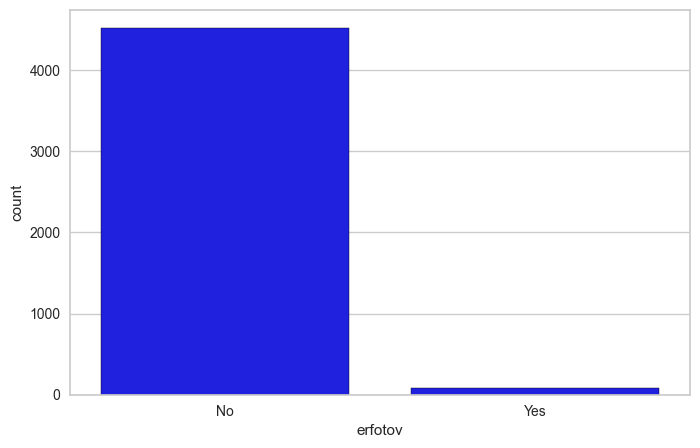

In [362]:
desbalanceo=b.Desbalanceo(encoded,"erfotov")
desbalanceo.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN TOMEKLINK**

-  Elimina pares de muestras cercanas entre la clase mayoritaria y la clase minoritaria donde el vecino más cercano de un punto de la clase minoritaria pertenece a la clase mayoritaria.

In [363]:
encoded.shape

(4599, 19)

In [364]:
balanced_tomek=desbalanceo.balancear_clases_tomek()

In [365]:
balanced_tomek.shape

(4562, 19)

In [366]:
balanced_tomek.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.005219,0.297673,0.905849,0.146988,0.799739,0.241792,0.043270,0.202218,0.44227,0.595564,0.318982,0.046749,0.248967,0.036095,-0.631358,0.363557,-1.537659,-1.854864,0
1,0.005219,0.297673,0.905849,0.146988,0.799739,0.758208,0.139813,0.202218,0.55773,0.404436,0.681018,0.681018,0.248967,0.036095,0.261297,0.363557,-1.537659,-1.854864,0


In [367]:
round(balanced_tomek["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    98.2
1     1.8
Name: proportion, dtype: float64

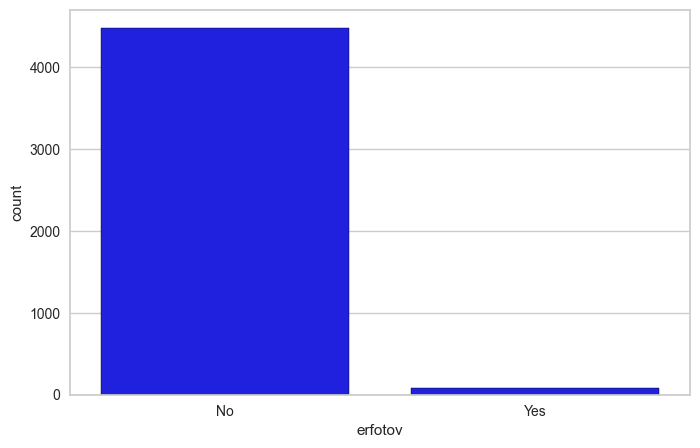

In [368]:
desbalanceo2=b.Desbalanceo(balanced_tomek,"erfotov")
desbalanceo2.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN SMOTENC PARA QUE NO TOQUE LAS CATEGORICAS**

In [369]:
columnas_son_cat_encoded=["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"]

In [370]:
balanced_tomek.shape

(4562, 19)

In [371]:
encoded.columns

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif',
       'annoedifinterv', 'estadoedif', 'accesoedif', 'ascensor', 'garaje',
       'nplazasgar', 'aguacalcent', 'ccaa', 'ayudas_ccaa', 'bonificaciones',
       'horas_de_sol', 'radiacion_solar', 'erfotov'],
      dtype='object')

In [372]:
df_balanceado_smote=desbalanceo2.balancear_clase_smotenc(columnas_son_cat_encoded, sampling_strategy=0.6)

In [373]:
df_balanceado_smote.head(3)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.005219,0.297673,0.905849,0.146988,0.799739,0.241792,0.043270,0.202218,0.44227,0.595564,0.318982,0.046749,0.248967,0.036095,-0.631358,0.363557,-1.537659,-1.854864,0
1,0.005219,0.297673,0.905849,0.146988,0.799739,0.758208,0.139813,0.202218,0.55773,0.404436,0.681018,0.681018,0.248967,0.036095,0.261297,0.363557,-1.537659,-1.854864,0
2,0.005219,0.388563,0.905849,0.457056,0.200261,0.758208,0.140900,0.044792,0.44227,0.595564,0.681018,0.681018,0.751033,0.036095,0.261297,0.363557,-1.537659,-1.854864,0


In [374]:
round(df_balanceado_smote["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.5
1    37.5
Name: proportion, dtype: float64

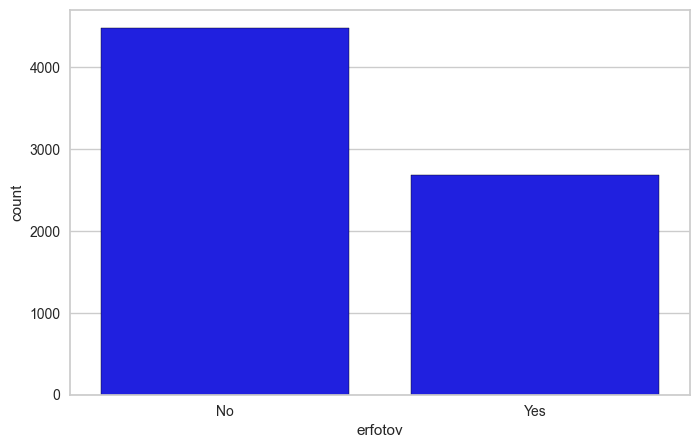

In [375]:
desbalanceo3=b.Desbalanceo(df_balanceado_smote,"erfotov")
desbalanceo3.visualizar_clase(color="blue", edgecolor="black")

In [376]:
df_balanceado_smote["erfotov"].unique()

array([0, 1], dtype=int64)

In [377]:
df_balanceado_smote.shape

(7168, 19)

In [378]:
balanced_tomek2=desbalanceo3.balancear_clases_tomek()

In [379]:
balanced_tomek2.shape

(7143, 19)

In [380]:
round(balanced_tomek2["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.37
1    37.63
Name: proportion, dtype: float64

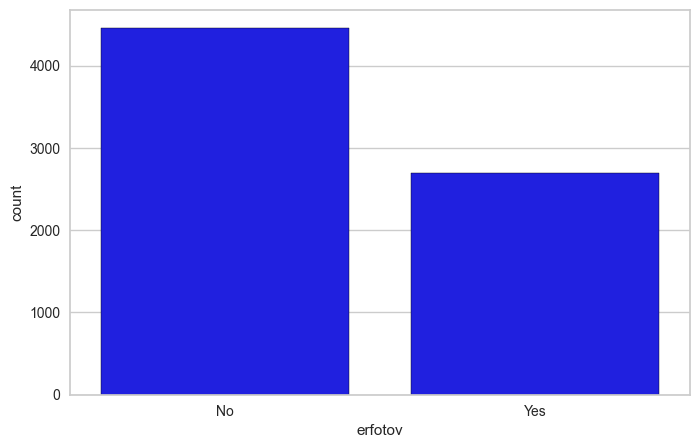

In [381]:
desbalanceo4=b.Desbalanceo(balanced_tomek2,"erfotov")
desbalanceo4.visualizar_clase(color="blue", edgecolor="black")

Uso el primer Tomek para reducir un poco la mayoritaria (No demasiado he de decir) y hacer los "márgenes más claros entre las clases. Luego uso el Smotenc que me hace un upsampling y finalmente uso un tomek de nuevo para volver a marcar bien las clases tras haber generado datos con el smotenc.

In [383]:
clas= pc_classification.setup(data=balanced_tomek2,
                              target="erfotov",
                              normalize=True,
                              session_id=42,
                              remove_multicollinearity=True,
                              fold=10,
                              transformation=True,
                              categorical_features=columnas_categoricas.tolist())

mejor_modelo_clasificacion= pc_classification.compare_models()

,Description,Value
0,Session id,42
1,Target,erfotov
2,Target type,Binary
3,Original data shape,"(7143, 19)"
4,Transformed data shape,"(7143, 78)"
5,Transformed train set shape,"(5000, 78)"
6,Transformed test set shape,"(2143, 78)"
7,Numeric features,3
8,Categorical features,15
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9838,0.9945,0.9724,0.9846,0.9784,0.9654,0.9655,0.4520
et,Extra Trees Classifier,0.9824,0.9932,0.9713,0.9819,0.9765,0.9624,0.9625,0.4570
lightgbm,Light Gradient Boosting Machine,0.9804,0.9934,0.9756,0.9727,0.9740,0.9583,0.9584,0.4990
dt,Decision Tree Classifier,0.9576,0.9572,0.9527,0.9360,0.9442,0.9100,0.9103,0.2860
gbc,Gradient Boosting Classifier,0.9476,0.9859,0.9463,0.9177,0.9316,0.8892,0.8897,0.5840
knn,K Neighbors Classifier,0.9116,0.9702,0.9607,0.8312,0.8912,0.8174,0.8237,0.3190
ada,Ada Boost Classifier,0.8790,0.9463,0.8475,0.8346,0.8405,0.7431,0.7437,0.4080
lr,Logistic Regression,0.8772,0.9380,0.8592,0.8228,0.8404,0.7407,0.7415,0.9930
ridge,Ridge Classifier,0.8704,0.9330,0.8831,0.7961,0.8369,0.7299,0.7332,0.2820
lda,Linear Discriminant Analysis,0.8694,0.9330,0.8836,0.7939,0.8360,0.7280,0.7315,0.3090


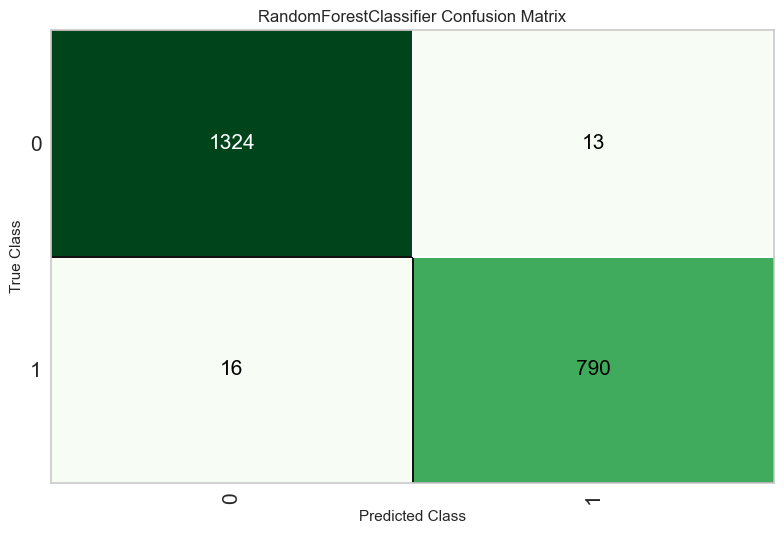

In [384]:
pc_classification.plot_model(mejor_modelo_clasificacion, plot="confusion_matrix")

### **Parece que el mejor modelo para estimar las viviendas ***PEQUEÑAS*** es un Random Forest cuyos datos están codificados con Frecuency, balanceados con SmotENC y Tomek, y escalados con Standarscaler.**

# **VIVIENDAS MEDIANAS**

In [385]:
df_sin_outmedianas.head()

,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,...,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,Álava,Municipio_pequeño,De 50.000 habitantes o menos,63.480315,Junio,2021,Si,No,1,Propia por compra con pagos pendientes,...,4,convencional,no tiene renovable,Sin internet,País Vasco,6200,IBI,2147,4.2,0
1,Álava,Municipio_pequeño,De 50.000 habitantes o menos,73.385525,Diciembre,2021,Si,No,1,Propia por herencia o donación,...,2,convencional,no tiene renovable,banda ancha fija,País Vasco,6200,IBI,2147,4.2,0
2,Álava,Municipio_pequeño,De 50.000 habitantes o menos,53.848172,Diciembre,2021,Si,No,1,Propia por compra totalmente pagada,...,2,convencional,no tiene renovable,banda ancha movil,País Vasco,6200,IBI,2147,4.2,0
3,Álava,Municipio_pequeño,De 50.000 habitantes o menos,82.763084,Junio,2021,Si,Si,4,Propia por compra con pagos pendientes,...,2,convencional,no tiene renovable,banda ancha fija,País Vasco,6200,IBI,2147,4.2,0
4,Álava,Municipio_pequeño,De 50.000 habitantes o menos,56.553506,Julio,2021,Si,No,1,Propia por compra totalmente pagada,...,De 5 a 9,No tiene vehiculo,no tiene renovable,Sin internet,País Vasco,6200,IBI,2147,4.2,0


### Filtramos las columnas máximas con las que vamos a poder crear un modelo que nos valga teniendo en cuenta los datos de los que disponemos (los de Red Piso)

In [386]:
df_sin_outmedianas.columns

Index(['idq_pv', 'idq_mun', 'tam_muni', 'factor', 'mesent', 'anoent', 'yoresi',
       'otroresi', 'nresi', 'regvi', 'pagovi', 'calefac', 'tipocombcale',
       'tipoagua', 'wc', 'boducha', 'aireacond', 'aislam', 'adaptada',
       'cocina', 'lavadora', 'lavavajillas', 'secadora', 'horno', 'microondas',
       'vitroinduc', 'naseos', 'nsalones', 'ndormito', 'nsototrast',
       'notrashabit', 'metrosvi', 'nvehiculos', 'papel', 'vidrio', 'envases',
       'organico', 'halogena', 'bajoconsumo', 'led', 'servdomes', 'ayudaext',
       'ruidos', 'contamin', 'sucio', 'malcomunic', 'pocoverde',
       'delincuencia', 'molesturist', 'colegio', 'csalud', 'super', 'farmacia',
       'bares', 'cambioresi', 'segunresi', 'lugsegunresi', 'otraccaa',
       'otropais', 'diasusa', 'ingrehog', 'tipoedif', 'tipoedifviv',
       'nplantassob', 'nplantasbajo', 'annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'gastuberia',
       'aguacalcent', 'evacuaguares', 'tipoe

In [387]:
df_sin_outmedianas_fil=df_sin_outmedianas[['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif','annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'aguacalcent', 'ccaa', 'ayudas_ccaa',
       'bonificaciones', 'horas_de_sol', 'radiacion_solar', 'erfotov']]

In [388]:
df_sin_outmedianas_fil.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,Álava,No tiene calefacción,1,3,Entre 76 y 90 m2,Multifamiliar,De 1991 a 2000,moderadamente bueno,No es accesible,No,Si,De 101 a 150,No,País Vasco,6200,IBI,2147,4.2,0
1,Álava,individual,1,3,Entre 61 y 75 m2,Multifamiliar,De 1951 a 1960,bueno,No es accesible,No,No,No tiene garaje,No,País Vasco,6200,IBI,2147,4.2,0


In [389]:
columnas_categoricas_med=df_sin_outmedianas_fil.select_dtypes(include=['object', 'category']).columns

In [390]:
columnas_categoricas_med

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif',
       'annoedifinterv', 'estadoedif', 'accesoedif', 'ascensor', 'garaje',
       'nplazasgar', 'aguacalcent', 'ccaa', 'bonificaciones'],
      dtype='object')

**AHORA HACIENDO EL ENCODING Y TRATANDO EL DESBALANCEO**

In [391]:
b.detectar_orden_cat(df_sin_outmedianas_fil, columnas_categoricas_med,"erfotov")

Estamos evaluando el orden de la variable IDQ_PV


erfotov,0,1
idq_pv,,
A Coruña,1604,9
Albacete,611,3
Alicante,2953,20
Almería,1166,3
Asturias,2884,20
Badajoz,1213,5
Baleares,1678,28
Barcelona,8950,87
Burgos,781,5


La variable idq_pv SI tiene orden porque su p-valor es : 1.1880979177318409e-26
Estamos evaluando el orden de la variable CALEFAC


erfotov,0,1
calefac,,
No pero sí aparato que permite calentar alguna habitación (por ejemplo radiadores eléctricos),17121,103
No tiene calefacción,19633,129
colectiva,7870,143
individual,40830,387


La variable calefac SI tiene orden porque su p-valor es : 2.4217109000222297e-22
Estamos evaluando el orden de la variable NASEOS


erfotov,0,1
naseos,,
0,55,1
1,51215,334
2,33517,416
3,618,10
4,49,1


La variable naseos SI tiene orden porque su p-valor es : 4.2006670960144067e-17
Estamos evaluando el orden de la variable NDORMITO


erfotov,0,1
ndormito,,
0,396,6
1,3431,55
2,25721,266
3,49611,389
4,6060,41
5,206,4
6,29,1


La variable ndormito SI tiene orden porque su p-valor es : 3.278357989740644e-07
Estamos evaluando el orden de la variable METROSVI


erfotov,0,1
metrosvi,,
Entre 46 y 60 m2,13006,128
Entre 61 y 75 m2,28058,217
Entre 76 y 90 m2,44390,417


La variable metrosvi SI tiene orden porque su p-valor es : 0.034616691685634
Estamos evaluando el orden de la variable TIPOEDIF


erfotov,0,1
tipoedif,,
Multifamiliar,70392,585
Unifamiliar,15062,177


La variable tipoedif SI tiene orden porque su p-valor es : 6.646771864616429e-05
Estamos evaluando el orden de la variable ANNOEDIFINTERV


erfotov,0,1
annoedifinterv,,
Anterior a 1900,2156,19
De 1900 a 1920,1559,10
De 1921 a 1940,2013,15
De 1941 a 1950,2379,17
De 1951 a 1960,5823,32
De 1961 a 1970,12670,53
De 1971 a 1980,16726,75
De 1981 a 1990,11098,66
De 1991 a 2000,13665,89


La variable annoedifinterv SI tiene orden porque su p-valor es : 3.515351707764224e-167
Estamos evaluando el orden de la variable ESTADOEDIF


erfotov,0,1
estadoedif,,
bueno,19350,131
casi inhabitable,158,1
casi perfecto,11545,154
inhabitable,291,2
levemente mejorable,6886,37
mejorable,852,5
moderadamente bueno,9677,61
moderadamente mejorable,1771,10
muy bueno,26342,224


La variable estadoedif SI tiene orden porque su p-valor es : 1.4419476829778324e-17
Estamos evaluando el orden de la variable ACCESOEDIF


erfotov,0,1
accesoedif,,
Es accesible,55782,620
No es accesible,29672,142


La variable accesoedif SI tiene orden porque su p-valor es : 2.0981626698838362e-20
Estamos evaluando el orden de la variable ASCENSOR


erfotov,0,1
ascensor,,
No,36202,246
Si,49252,516


La variable ascensor SI tiene orden porque su p-valor es : 2.5275703244255525e-08
Estamos evaluando el orden de la variable GARAJE


erfotov,0,1
garaje,,
No,45394,237
Si,40060,525


La variable garaje SI tiene orden porque su p-valor es : 1.2420107599561358e-33
Estamos evaluando el orden de la variable NPLAZASGAR


erfotov,0,1
nplazasgar,,
1,5128,52
2,2086,39
De 101 a 150,2724,57
De 11 a 20,6125,49
De 21 a 50,9497,104
De 3 a 5,1775,20
De 51 a 100,6491,96
De 6 a 10,3234,21
Más de 150,3000,87


La variable nplazasgar SI tiene orden porque su p-valor es : 2.764592564816921e-59
Estamos evaluando el orden de la variable AGUACALCENT


erfotov,0,1
aguacalcent,,
No,63822,370
Si,21632,392


La variable aguacalcent SI tiene orden porque su p-valor es : 1.2900980860665134e-60
Estamos evaluando el orden de la variable CCAA


erfotov,0,1
ccaa,,
Andalucía,12830,63
Aragón,3104,54
Asturias,2884,20
Cantabria,2238,7
Castilla y León,6987,55
Castilla-La Mancha,3514,26
Cataluña,11312,112
Ceuta,952,5
Comunidad Valenciana,6498,40


La variable ccaa SI tiene orden porque su p-valor es : 2.511085547764777e-21
Estamos evaluando el orden de la variable BONIFICACIONES


erfotov,0,1
bonificaciones,,
IBI,39316,383
IBI y ICIO,44262,370
Ninguna,1876,9


La variable bonificaciones SI tiene orden porque su p-valor es : 0.01783442848617836


#### CONCLUSIONES SOBRE EL ORDEN EN LAS MEDIANAS:  

**ORDENADAS:**  
- calefac 
- naseos  
- metrosvi  
- tipoedif  
- annoedifinterv  
- ascensor  
- aguacalcent  
- ccaa  
- idq_pv  
- ndormito  
- estadoedif   
- accesoedif  
- garaje  
- nplazasgar
- bonificaciones 
  

*- Ordinal Encoding  (Los codifica en función de los pesos que le digamos)*  
*- Label Encoding (Los codifica en orden alfabetico)*  
*- Target Encoding (Los codifica en funcion de las medias (osea en función de la relación con la variable dependiente))*  
*- Frequency Encoding (Los codifica en funcion de la frecuencia(en función del value_counts))*  



OPTO POR UN FREQUENCY

In [392]:
diccionario_encoding_med = {"onehot": [], 
                        "dummies": [], # no metemos ninguna
                        'ordinal' : { }, #no metemos ninguna
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": ["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"],
                        "target": ["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"]  
                        }

In [393]:
encoding_med=b.Encoding(df_sin_outmedianas_fil, diccionario_encoding_med, "erfotov")
encoded_med=encoding_med.frequency_encoding()

In [394]:
encoded_med.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.012886,0.229215,0.597905,0.579939,0.519706,0.823246,0.159530,0.112949,0.345806,0.422752,0.470736,0.032256,0.744549,0.058342,6200,0.46046,2147,4.2,0
1,0.012886,0.478067,0.597905,0.579939,0.327955,0.823246,0.067911,0.225956,0.345806,0.422752,0.529264,0.529264,0.744549,0.058342,6200,0.46046,2147,4.2,0
2,0.012886,0.478067,0.597905,0.301417,0.152338,0.823246,0.129489,0.308133,0.654194,0.577248,0.470736,0.071611,0.744549,0.058342,6200,0.46046,2147,4.2,0
3,0.012886,0.478067,0.393581,0.579939,0.327955,0.823246,0.178528,0.080298,0.654194,0.577248,0.470736,0.060082,0.744549,0.058342,6200,0.46046,2147,4.2,0
4,0.012886,0.478067,0.597905,0.301417,0.327955,0.823246,0.147571,0.112949,0.654194,0.577248,0.529264,0.529264,0.744549,0.058342,6200,0.46046,2147,4.2,0


**AHORA HACIENDO LA ESTANDARIZACIÓN**

In [395]:
scaler=MinMaxScaler()
nums_med=encoded_med.select_dtypes(include=np.number)
nums_med.drop(columns="erfotov", inplace=True)
nums_med.drop(columns=columnas_categoricas_med, inplace=True)
cols_num_med=nums_med.columns
dfa_med=scaler.fit_transform(nums_med)
df_med=pd.DataFrame(dfa_med, columns=cols_num_med)
encoded_med[cols_num_med]= df_med

In [396]:
encoded_med.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.012886,0.229215,0.597905,0.579939,0.519706,0.823246,0.159530,0.112949,0.345806,0.422752,0.470736,0.032256,0.744549,0.058342,0.533333,0.46046,0.269068,0.247934,0
1,0.012886,0.478067,0.597905,0.579939,0.327955,0.823246,0.067911,0.225956,0.345806,0.422752,0.529264,0.529264,0.744549,0.058342,0.533333,0.46046,0.269068,0.247934,0
2,0.012886,0.478067,0.597905,0.301417,0.152338,0.823246,0.129489,0.308133,0.654194,0.577248,0.470736,0.071611,0.744549,0.058342,0.533333,0.46046,0.269068,0.247934,0
3,0.012886,0.478067,0.393581,0.579939,0.327955,0.823246,0.178528,0.080298,0.654194,0.577248,0.470736,0.060082,0.744549,0.058342,0.533333,0.46046,0.269068,0.247934,0
4,0.012886,0.478067,0.597905,0.301417,0.327955,0.823246,0.147571,0.112949,0.654194,0.577248,0.529264,0.529264,0.744549,0.058342,0.533333,0.46046,0.269068,0.247934,0


AHORA EL DESBALANCEO

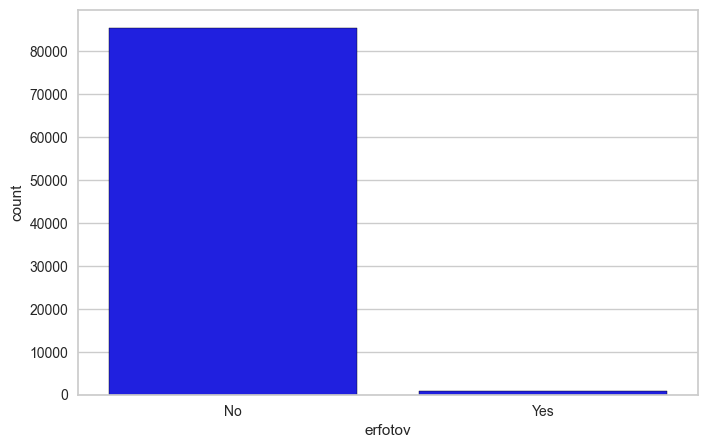

In [397]:
desbalanceo_med=b.Desbalanceo(encoded_med,"erfotov")
desbalanceo_med.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN TOMEKLINK**

-  Elimina pares de muestras cercanas entre la clase mayoritaria y la clase minoritaria donde el vecino más cercano de un punto de la clase minoritaria pertenece a la clase mayoritaria.

In [398]:
encoded_med.shape

(86216, 19)

In [399]:
balanced_tomek_med=desbalanceo_med.balancear_clases_tomek()

In [400]:
balanced_tomek_med.shape

(85929, 19)

In [401]:
balanced_tomek_med.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.012886,0.229215,0.597905,0.579939,0.519706,0.823246,0.159530,0.112949,0.345806,0.422752,0.470736,0.032256,0.744549,0.058342,0.533333,0.46046,0.269068,0.247934,0
1,0.012886,0.478067,0.597905,0.579939,0.327955,0.823246,0.067911,0.225956,0.345806,0.422752,0.529264,0.529264,0.744549,0.058342,0.533333,0.46046,0.269068,0.247934,0


In [402]:
round(balanced_tomek_med["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    99.11
1     0.89
Name: proportion, dtype: float64

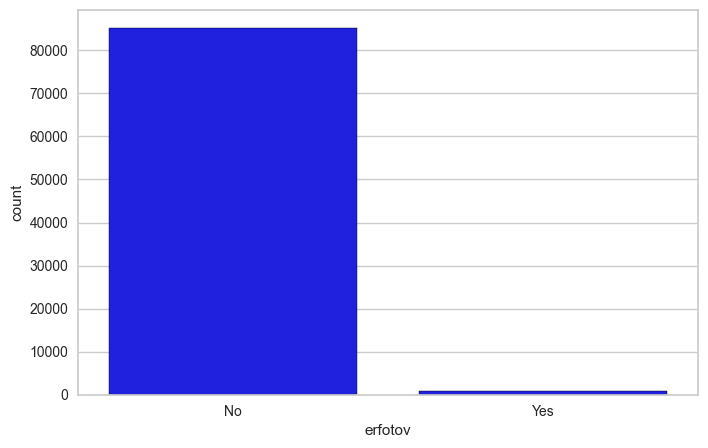

In [403]:
desbalanceo_med2=b.Desbalanceo(balanced_tomek_med,"erfotov")
desbalanceo_med2.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN SMOTENC PARA QUE NO TOQUE LAS CATEGORICAS**

In [404]:
columnas_son_cat_encoded_med=["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"]

In [405]:
balanced_tomek_med.shape

(85929, 19)

In [406]:
encoded_med.columns

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif',
       'annoedifinterv', 'estadoedif', 'accesoedif', 'ascensor', 'garaje',
       'nplazasgar', 'aguacalcent', 'ccaa', 'ayudas_ccaa', 'bonificaciones',
       'horas_de_sol', 'radiacion_solar', 'erfotov'],
      dtype='object')

In [407]:
df_balanceado_smote_med=desbalanceo_med2.balancear_clase_smotenc(columnas_son_cat_encoded_med, sampling_strategy=0.6)

In [408]:
df_balanceado_smote_med.head(3)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.012886,0.229215,0.597905,0.579939,0.519706,0.823246,0.159530,0.112949,0.345806,0.422752,0.470736,0.032256,0.744549,0.058342,0.533333,0.46046,0.269068,0.247934,0
1,0.012886,0.478067,0.597905,0.579939,0.327955,0.823246,0.067911,0.225956,0.345806,0.422752,0.529264,0.529264,0.744549,0.058342,0.533333,0.46046,0.269068,0.247934,0
2,0.012886,0.478067,0.597905,0.301417,0.152338,0.823246,0.129489,0.308133,0.654194,0.577248,0.470736,0.071611,0.744549,0.058342,0.533333,0.46046,0.269068,0.247934,0


In [409]:
round(df_balanceado_smote_med["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.5
1    37.5
Name: proportion, dtype: float64

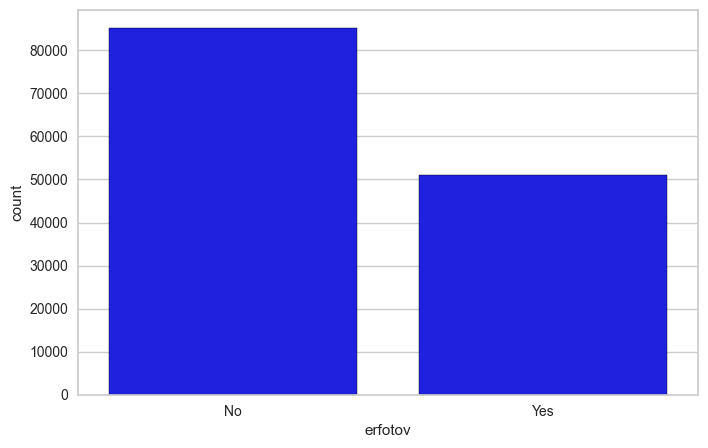

In [410]:
desbalanceo_med3=b.Desbalanceo(df_balanceado_smote_med,"erfotov")
desbalanceo_med3.visualizar_clase(color="blue", edgecolor="black")

In [411]:
df_balanceado_smote_med["erfotov"].unique()

array([0, 1], dtype=int64)

In [412]:
df_balanceado_smote_med.shape

(136267, 19)

In [413]:
balanced_tomek_med2=desbalanceo_med3.balancear_clases_tomek()

In [414]:
balanced_tomek_med2.shape

(136083, 19)

In [415]:
round(balanced_tomek_med2["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.45
1    37.55
Name: proportion, dtype: float64

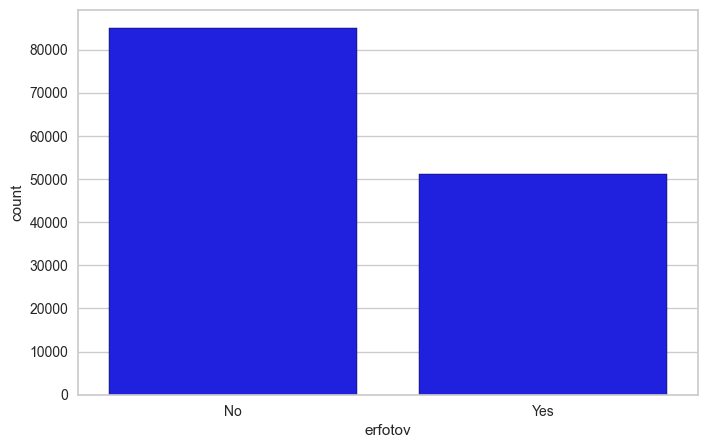

In [416]:
desbalanceo_med4=b.Desbalanceo(balanced_tomek_med2,"erfotov")
desbalanceo_med4.visualizar_clase(color="blue", edgecolor="black")

Uso el primer Tomek para reducir un poco la mayoritaria (No demasiado he de decir) y hacer los "márgenes más claros entre las clases. Luego uso el Smotenc que me hace un upsampling y finalmente uso un tomek de nuevo para volver a marcar bien las clases tras haber generado datos con el smotenc.

In [417]:
clas_med= pc_classification.setup(data=balanced_tomek_med2,
                              target="erfotov",
                              normalize=True,
                              session_id=42,
                              remove_multicollinearity=True,
                              fold=10,
                              transformation=True,
                              categorical_features=columnas_categoricas_med.tolist())

mejor_modelo_clasificacion_med= pc_classification.compare_models()

,Description,Value
0,Session id,42
1,Target,erfotov
2,Target type,Binary
3,Original data shape,"(136083, 19)"
4,Transformed data shape,"(136083, 82)"
5,Transformed train set shape,"(95258, 82)"
6,Transformed test set shape,"(40825, 82)"
7,Numeric features,3
8,Categorical features,15
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9838,0.9948,0.9850,0.9723,0.9786,0.9656,0.9657,8.3920
et,Extra Trees Classifier,0.9834,0.9934,0.9837,0.9723,0.9780,0.9646,0.9646,10.3500
dt,Decision Tree Classifier,0.9699,0.9755,0.9783,0.9435,0.9606,0.9362,0.9366,4.5890
knn,K Neighbors Classifier,0.9491,0.9816,0.9835,0.8920,0.9355,0.8936,0.8965,10.7370
lightgbm,Light Gradient Boosting Machine,0.9242,0.9764,0.9104,0.8903,0.9002,0.8392,0.8393,5.1030
gbc,Gradient Boosting Classifier,0.8354,0.9061,0.7208,0.8191,0.7668,0.6404,0.6435,12.3960
lr,Logistic Regression,0.7935,0.8501,0.6847,0.7447,0.7134,0.5524,0.5536,4.5920
ada,Ada Boost Classifier,0.7926,0.8549,0.6733,0.7490,0.7091,0.5487,0.5506,6.2590
lda,Linear Discriminant Analysis,0.7899,0.8468,0.6810,0.7390,0.7088,0.5449,0.5460,4.8490
ridge,Ridge Classifier,0.7890,0.8468,0.6739,0.7408,0.7057,0.5418,0.5433,4.6070


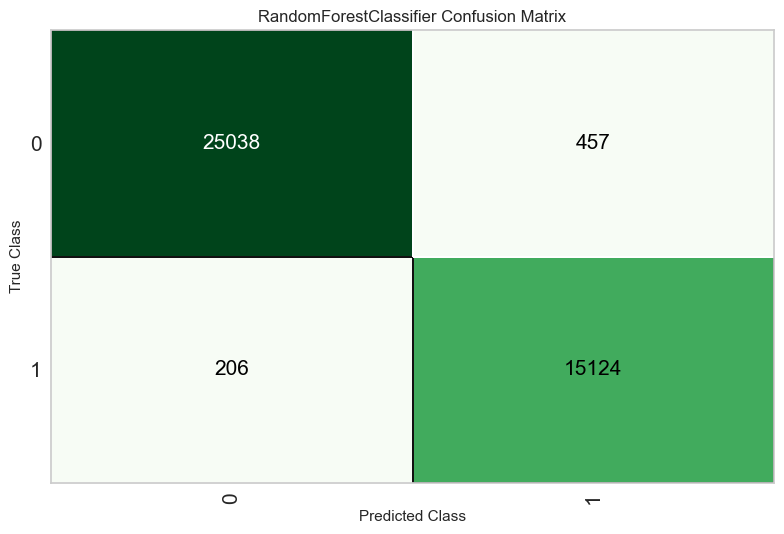

In [418]:
pc_classification.plot_model(mejor_modelo_clasificacion_med, plot="confusion_matrix")

### **Parece que el mejor modelo para estimar las viviendas ***PEQUEÑAS*** es un Random Forest cuyos datos están codificados con Frecuency, balanceados con SmotENC y Tomek, y escalados con MinMaxscaler.**

# **VIVIENDAS Amplias**

In [419]:
df_sin_outamplias.head()

,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,...,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,Álava,Municipio_pequeño,De 50.000 habitantes o menos,53.005532,Julio,2021,No,Si,2,Propia por compra totalmente pagada,...,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,0
1,Álava,Municipio_pequeño,De 50.000 habitantes o menos,61.559149,Junio,2021,Si,Si,4,Propia por compra con pagos pendientes,...,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,0
2,Álava,Municipio_pequeño,De 50.000 habitantes o menos,59.495080,Mayo,2021,Si,Si,4,Propia por compra totalmente pagada,...,1,convencional,no tiene renovable,banda ancha movil,País Vasco,4800,IBI,2147,4.2,0
3,Álava,Municipio_pequeño,De 50.000 habitantes o menos,60.703336,Julio,2021,Si,Si,3,Propia por compra totalmente pagada,...,2,convencional,no tiene renovable,banda ancha movil,País Vasco,6200,IBI,2147,4.2,0
4,Álava,Municipio_pequeño,De 50.000 habitantes o menos,68.234366,Diciembre,2021,Si,Si,2,Propia por herencia o donación,...,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,0


### Filtramos las columnas máximas con las que vamos a poder crear un modelo que nos valga teniendo en cuenta los datos de los que disponemos (los de Red Piso)

In [420]:
df_sin_outamplias.columns

Index(['idq_pv', 'idq_mun', 'tam_muni', 'factor', 'mesent', 'anoent', 'yoresi',
       'otroresi', 'nresi', 'regvi', 'pagovi', 'calefac', 'tipocombcale',
       'tipoagua', 'wc', 'boducha', 'aireacond', 'aislam', 'adaptada',
       'cocina', 'lavadora', 'lavavajillas', 'secadora', 'horno', 'microondas',
       'vitroinduc', 'naseos', 'nsalones', 'ndormito', 'nsototrast',
       'notrashabit', 'metrosvi', 'nvehiculos', 'papel', 'vidrio', 'envases',
       'organico', 'halogena', 'bajoconsumo', 'led', 'servdomes', 'ayudaext',
       'ruidos', 'contamin', 'sucio', 'malcomunic', 'pocoverde',
       'delincuencia', 'molesturist', 'colegio', 'csalud', 'super', 'farmacia',
       'bares', 'cambioresi', 'segunresi', 'lugsegunresi', 'otraccaa',
       'otropais', 'diasusa', 'ingrehog', 'tipoedif', 'tipoedifviv',
       'nplantassob', 'nplantasbajo', 'annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'gastuberia',
       'aguacalcent', 'evacuaguares', 'tipoe

In [421]:
df_sin_outamplias_fil=df_sin_outamplias[['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif','annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'aguacalcent', 'ccaa', 'ayudas_ccaa',
       'bonificaciones', 'horas_de_sol', 'radiacion_solar', 'erfotov']]

In [422]:
df_sin_outamplias_fil.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,Álava,individual,3,3,Entre 121 y 150 m2,Unifamiliar,De 1991 a 2000,casi perfecto,No es accesible,No,Si,2,Si,País Vasco,4800,IBI,2147,4.2,0
1,Álava,individual,4,4,Entre 106 y 120 m2,Unifamiliar,De 2001 a 2010,casi perfecto,Es accesible,No,Si,1,No,País Vasco,4800,IBI,2147,4.2,0


In [423]:
columnas_categoricas_amp=df_sin_outamplias_fil.select_dtypes(include=['object', 'category']).columns

In [424]:
columnas_categoricas_amp

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif',
       'annoedifinterv', 'estadoedif', 'accesoedif', 'ascensor', 'garaje',
       'nplazasgar', 'aguacalcent', 'ccaa', 'bonificaciones'],
      dtype='object')

<!-- **AHORA HACIENDO EL ENCODING Y TRATANDO EL DESBALANCEO** -->

In [425]:
b.detectar_orden_cat(df_sin_outamplias_fil, columnas_categoricas_amp,"erfotov")

Estamos evaluando el orden de la variable IDQ_PV


erfotov,0,1
idq_pv,,
A Coruña,1214,6
Albacete,703,3
Alicante,2227,25
Almería,911,8
Asturias,1163,7
Badajoz,1353,7
Baleares,2142,56
Barcelona,3656,47
Burgos,522,5


La variable idq_pv SI tiene orden porque su p-valor es : 1.904688562862776e-12
Estamos evaluando el orden de la variable CALEFAC


erfotov,0,1
calefac,,
No pero sí aparato que permite calentar alguna habitación (por ejemplo radiadores eléctricos),11037,127
No tiene calefacción,10915,98
colectiva,6170,72
individual,32130,390


La variable calefac NO tiene orden porque su p-valor es : 0.06786185293877904
Estamos evaluando el orden de la variable NASEOS


erfotov,0,1
naseos,,
0,29,1
1,12510,97
2,41160,480
3,6074,96
4,435,11
5,44,2


La variable naseos SI tiene orden porque su p-valor es : 4.4111977528773476e-07
Estamos evaluando el orden de la variable NDORMITO


erfotov,0,1
ndormito,,
0,161,3
1,507,10
2,5512,79
3,34146,408
4,17694,165
5,1794,17
6,368,5
7,70,0


La variable ndormito SI tiene orden porque su p-valor es : 0.018177687323110557
Estamos evaluando el orden de la variable METROSVI


erfotov,0,1
metrosvi,,
Entre 106 y 120 m2,18083,198
Entre 121 y 150 m2,13795,201
Entre 91 y 105 m2,28374,288


La variable metrosvi SI tiene orden porque su p-valor es : 0.0003106472435112266
Estamos evaluando el orden de la variable TIPOEDIF


erfotov,0,1
tipoedif,,
Multifamiliar,33078,278
Unifamiliar,27174,409


La variable tipoedif SI tiene orden porque su p-valor es : 5.520436187311271e-14
Estamos evaluando el orden de la variable ANNOEDIFINTERV


erfotov,0,1
annoedifinterv,,
Anterior a 1900,2622,29
De 1900 a 1920,1705,15
De 1921 a 1940,1990,11
De 1941 a 1950,1773,13
De 1951 a 1960,3004,32
De 1961 a 1970,5764,50
De 1971 a 1980,10742,74
De 1981 a 1990,9273,87
De 1991 a 2000,11123,113


La variable annoedifinterv SI tiene orden porque su p-valor es : 1.4482124922523975e-71
Estamos evaluando el orden de la variable ESTADOEDIF


erfotov,0,1
estadoedif,,
bueno,11803,85
casi inhabitable,49,1
casi perfecto,11511,172
inhabitable,62,0
levemente mejorable,2656,24
mejorable,220,1
moderadamente bueno,4707,29
moderadamente mejorable,553,4
muy bueno,19974,194


La variable estadoedif SI tiene orden porque su p-valor es : 3.8299951425424177e-19
Estamos evaluando el orden de la variable ACCESOEDIF


erfotov,0,1
accesoedif,,
Es accesible,41548,499
No es accesible,18704,188


La variable accesoedif SI tiene orden porque su p-valor es : 0.042265199335972455
Estamos evaluando el orden de la variable ASCENSOR


erfotov,0,1
ascensor,,
No,33885,448
Si,26367,239


La variable ascensor SI tiene orden porque su p-valor es : 2.922793352835902e-06
Estamos evaluando el orden de la variable GARAJE


erfotov,0,1
garaje,,
No,23197,197
Si,37055,490


La variable garaje SI tiene orden porque su p-valor es : 1.736531351572132e-07
Estamos evaluando el orden de la variable NPLAZASGAR


erfotov,0,1
nplazasgar,,
1,10014,141
2,5699,97
De 101 a 150,1626,15
De 11 a 20,3795,36
De 21 a 50,5843,58
De 3 a 5,2356,41
De 51 a 100,3821,43
De 6 a 10,2095,17
Más de 150,1806,42


La variable nplazasgar SI tiene orden porque su p-valor es : 4.2359442858934665e-12
Estamos evaluando el orden de la variable AGUACALCENT


erfotov,0,1
aguacalcent,,
No,39435,350
Si,20817,337


La variable aguacalcent SI tiene orden porque su p-valor es : 2.786669632417191e-15
Estamos evaluando el orden de la variable CCAA


erfotov,0,1
ccaa,,
Andalucía,8930,115
Aragón,2306,34
Asturias,1163,7
Cantabria,1339,13
Castilla y León,5594,38
Castilla-La Mancha,3867,19
Cataluña,5748,75
Ceuta,347,5
Comunidad Valenciana,6115,64


La variable ccaa SI tiene orden porque su p-valor es : 2.0346144966879359e-16
Estamos evaluando el orden de la variable BONIFICACIONES


erfotov,0,1
bonificaciones,,
IBI,25134,274
IBI y ICIO,34347,406
Ninguna,771,7


La variable bonificaciones NO tiene orden porque su p-valor es : 0.4893939631230676


#### CONCLUSIONES SOBRE EL ORDEN:  

**NO ORDENADAS:**
- calefac  
- bonificaciones  
  
 *- get- dummies (pandas)*  
 *- One-Hot Encoding (SKlearn) (es más efectivo)*  
 *Ambas te crean tantas columnas como categorias hay en la columna y hace que en esa solo valga 1 las que coincidan y 0 el resto*


**ORDENADAS:**  
- idq_pv 
- naseos  
- metrosvi  
- tipoedif  
- annoedifinterv  
- ascensor  
- aguacalcent  
- ccaa  
- ndormito  
- estadoedif  
- accesoedif  
- garaje  
- nplazasgar  

*- Ordinal Encoding  (Los codifica en función de los pesos que le digamos)*  
*- Label Encoding (Los codifica en orden alfabetico)*  
*- Target Encoding (Los codifica en funcion de las medias (osea en función de la relación con la variable dependiente))*  
*- Frequency Encoding (Los codifica en funcion de la frecuencia(en función del value_counts))*  



OPTO POR UN FREQUENCY

In [426]:
diccionario_encoding_amp = {"onehot": ["calefac", "bonificaciones"], 
                        "dummies": [], # no metemos ninguna
                        'ordinal' : { }, #no metemos ninguna
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": ["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"], 
                        "target": ["naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar"]  
                        }

In [427]:
encoding_amp=b.Encoding(df_sin_outamplias_fil, diccionario_encoding_amp, "erfotov")
encoded_amp=encoding_amp.frequency_encoding()

In [428]:
encoded_amp.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.006826,0.533648,0.101249,0.567026,0.229672,0.452633,0.184381,0.191716,0.310015,0.563399,0.616108,0.095112,0.347134,0.027569,4800,0.416942,2147,4.2,0
1,0.006826,0.533648,0.007319,0.293064,0.299989,0.452633,0.181312,0.191716,0.689985,0.563399,0.616108,0.166642,0.652866,0.027569,4800,0.416942,2147,4.2,0
2,0.006826,0.533648,0.101249,0.567026,0.470339,0.452633,0.181312,0.191716,0.310015,0.563399,0.616108,0.166642,0.652866,0.027569,4800,0.416942,2147,4.2,0
3,0.006826,0.533648,0.206879,0.567026,0.470339,0.547367,0.177489,0.330954,0.689985,0.436601,0.383892,0.383892,0.347134,0.027569,6200,0.416942,2147,4.2,0
4,0.006826,0.533648,0.683306,0.567026,0.470339,0.452633,0.032836,0.191716,0.689985,0.563399,0.383892,0.383892,0.652866,0.027569,4800,0.416942,2147,4.2,0


**AHORA HACIENDO LA ESTANDARIZACIÓN**

In [429]:
scaler_amp=StandardScaler()
nums_amp=encoded_amp.select_dtypes(include=np.number)
nums_amp.drop(columns="erfotov", inplace=True)
nums_amp.drop(columns=columnas_categoricas_amp, inplace=True)
cols_num_amp=nums_amp.columns
dfa_amp=scaler_amp.fit_transform(nums_amp)
df_amp=pd.DataFrame(dfa_amp, columns=cols_num_amp)
encoded_amp[cols_num_amp]= df_amp

In [430]:
encoded_amp.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.006826,0.533648,0.101249,0.567026,0.229672,0.452633,0.184381,0.191716,0.310015,0.563399,0.616108,0.095112,0.347134,0.027569,-0.235552,0.416942,-1.715464,-1.960838,0
1,0.006826,0.533648,0.007319,0.293064,0.299989,0.452633,0.181312,0.191716,0.689985,0.563399,0.616108,0.166642,0.652866,0.027569,-0.235552,0.416942,-1.715464,-1.960838,0
2,0.006826,0.533648,0.101249,0.567026,0.470339,0.452633,0.181312,0.191716,0.310015,0.563399,0.616108,0.166642,0.652866,0.027569,-0.235552,0.416942,-1.715464,-1.960838,0
3,0.006826,0.533648,0.206879,0.567026,0.470339,0.547367,0.177489,0.330954,0.689985,0.436601,0.383892,0.383892,0.347134,0.027569,0.676719,0.416942,-1.715464,-1.960838,0
4,0.006826,0.533648,0.683306,0.567026,0.470339,0.452633,0.032836,0.191716,0.689985,0.563399,0.383892,0.383892,0.652866,0.027569,-0.235552,0.416942,-1.715464,-1.960838,0


AHORA EL DESBALANCEO

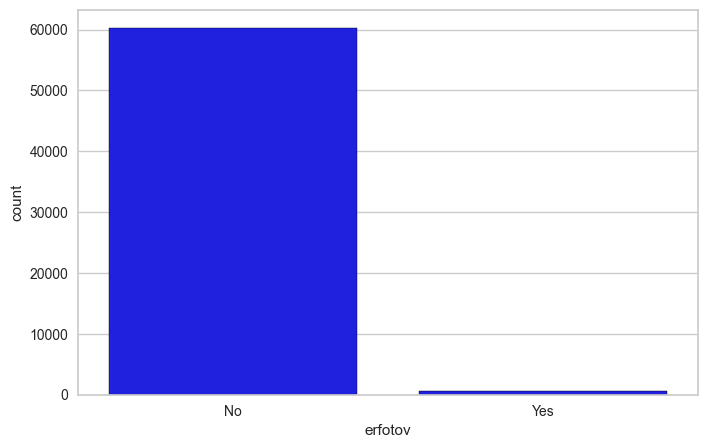

In [431]:
desbalanceo_amp=b.Desbalanceo(encoded_amp,"erfotov")
desbalanceo_amp.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN TOMEKLINK**

-  Elimina pares de muestras cercanas entre la clase mayoritaria y la clase minoritaria donde el vecino más cercano de un punto de la clase minoritaria pertenece a la clase mayoritaria.

In [432]:
encoded_amp.shape

(60939, 19)

In [433]:
balanced_tomek_amp=desbalanceo_amp.balancear_clases_tomek()

In [434]:
balanced_tomek_amp.shape

(60619, 19)

In [435]:
balanced_tomek_amp.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.006826,0.533648,0.101249,0.567026,0.229672,0.452633,0.184381,0.191716,0.310015,0.563399,0.616108,0.095112,0.347134,0.027569,-0.235552,0.416942,-1.715464,-1.960838,0
1,0.006826,0.533648,0.007319,0.293064,0.299989,0.452633,0.181312,0.191716,0.689985,0.563399,0.616108,0.166642,0.652866,0.027569,-0.235552,0.416942,-1.715464,-1.960838,0


In [436]:
round(balanced_tomek_amp["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    98.87
1     1.13
Name: proportion, dtype: float64

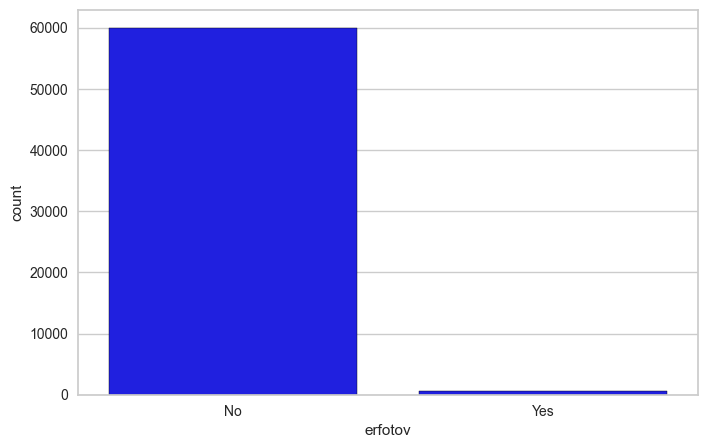

In [437]:
desbalanceo2_amp=b.Desbalanceo(balanced_tomek_amp,"erfotov")
desbalanceo2_amp.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN SMOTENC PARA QUE NO TOQUE LAS CATEGORICAS**

In [438]:
columnas_son_cat_encoded_amp=["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"]

In [439]:
balanced_tomek_amp.shape

(60619, 19)

In [440]:
encoded_amp.columns

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif',
       'annoedifinterv', 'estadoedif', 'accesoedif', 'ascensor', 'garaje',
       'nplazasgar', 'aguacalcent', 'ccaa', 'ayudas_ccaa', 'bonificaciones',
       'horas_de_sol', 'radiacion_solar', 'erfotov'],
      dtype='object')

In [441]:
df_balanceado_smote_amp=desbalanceo2_amp.balancear_clase_smotenc(columnas_son_cat_encoded_amp, sampling_strategy=0.6)

In [442]:
df_balanceado_smote_amp.head(3)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.006826,0.533648,0.101249,0.567026,0.229672,0.452633,0.184381,0.191716,0.310015,0.563399,0.616108,0.095112,0.347134,0.027569,-0.235552,0.416942,-1.715464,-1.960838,0
1,0.006826,0.533648,0.007319,0.293064,0.299989,0.452633,0.181312,0.191716,0.689985,0.563399,0.616108,0.166642,0.652866,0.027569,-0.235552,0.416942,-1.715464,-1.960838,0
2,0.006826,0.533648,0.101249,0.567026,0.470339,0.452633,0.181312,0.191716,0.310015,0.563399,0.616108,0.166642,0.652866,0.027569,-0.235552,0.416942,-1.715464,-1.960838,0


In [443]:
round(df_balanceado_smote_amp["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.5
1    37.5
Name: proportion, dtype: float64

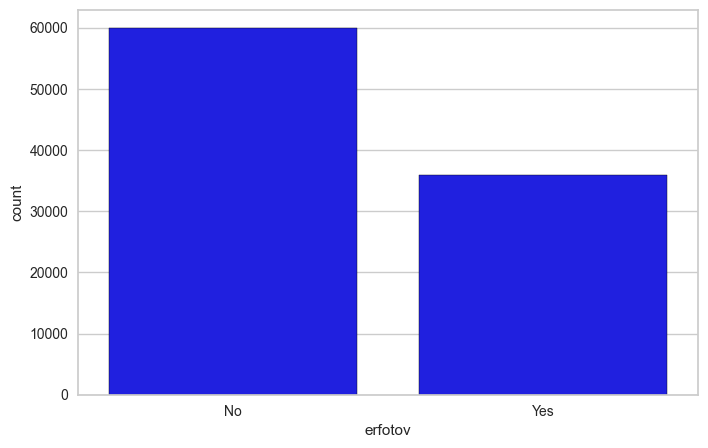

In [444]:
desbalanceo3_amp=b.Desbalanceo(df_balanceado_smote_amp,"erfotov")
desbalanceo3_amp.visualizar_clase(color="blue", edgecolor="black")

In [445]:
df_balanceado_smote_amp["erfotov"].unique()

array([0, 1], dtype=int64)

In [446]:
df_balanceado_smote_amp.shape

(95891, 19)

In [447]:
balanced_tomek2_amp=desbalanceo3_amp.balancear_clases_tomek()

In [448]:
balanced_tomek2_amp.shape

(95666, 19)

In [449]:
round(balanced_tomek2_amp["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.41
1    37.59
Name: proportion, dtype: float64

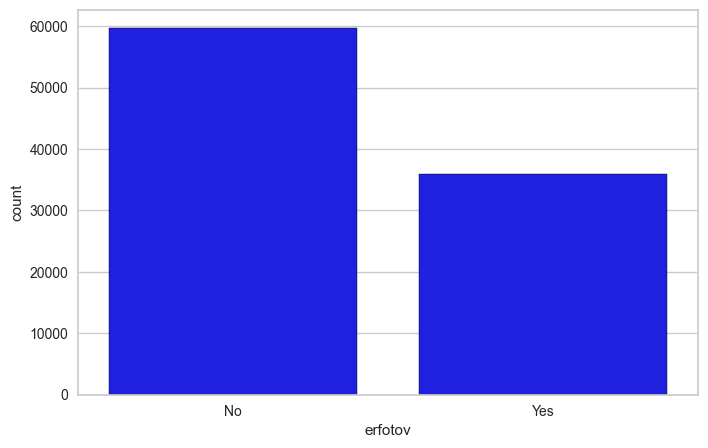

In [450]:
desbalanceo4_amp=b.Desbalanceo(balanced_tomek2_amp,"erfotov")
desbalanceo4_amp.visualizar_clase(color="blue", edgecolor="black")

Uso el primer Tomek para reducir un poco la mayoritaria (No demasiado he de decir) y hacer los "márgenes más claros entre las clases. Luego uso el Smotenc que me hace un upsampling y finalmente uso un tomek de nuevo para volver a marcar bien las clases tras haber generado datos con el smotenc.

In [451]:
clas_amp= pc_classification.setup(data=balanced_tomek2_amp,
                              target="erfotov",
                              normalize=True,
                              session_id=42,
                              remove_multicollinearity=True,
                              fold=10,
                              transformation=True,
                              categorical_features=columnas_categoricas_amp.tolist())

mejor_modelo_clasificacion_amp= pc_classification.compare_models()

,Description,Value
0,Session id,42
1,Target,erfotov
2,Target type,Binary
3,Original data shape,"(95666, 19)"
4,Transformed data shape,"(95666, 85)"
5,Transformed train set shape,"(66966, 85)"
6,Transformed test set shape,"(28700, 85)"
7,Numeric features,3
8,Categorical features,15
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9854,0.9951,0.9829,0.9783,0.9806,0.9688,0.9688,5.3420
et,Extra Trees Classifier,0.9846,0.9936,0.9806,0.9785,0.9795,0.9672,0.9672,6.5940
dt,Decision Tree Classifier,0.9660,0.9689,0.9739,0.9380,0.9556,0.9280,0.9285,2.9700
knn,K Neighbors Classifier,0.9411,0.9792,0.9847,0.8745,0.9263,0.8776,0.8819,5.9170
lightgbm,Light Gradient Boosting Machine,0.9338,0.9799,0.9342,0.8943,0.9138,0.8601,0.8606,3.5340
gbc,Gradient Boosting Classifier,0.8353,0.9157,0.7558,0.7959,0.7753,0.6455,0.6461,7.8750
ridge,Ridge Classifier,0.7926,0.8553,0.6964,0.7373,0.7162,0.5530,0.5536,2.7520
lda,Linear Discriminant Analysis,0.7923,0.8553,0.7009,0.7345,0.7173,0.5533,0.5537,3.2830
lr,Logistic Regression,0.7918,0.8585,0.6991,0.7344,0.7163,0.5521,0.5525,2.9060
ada,Ada Boost Classifier,0.7897,0.8629,0.6824,0.7382,0.7092,0.5448,0.5459,4.4350


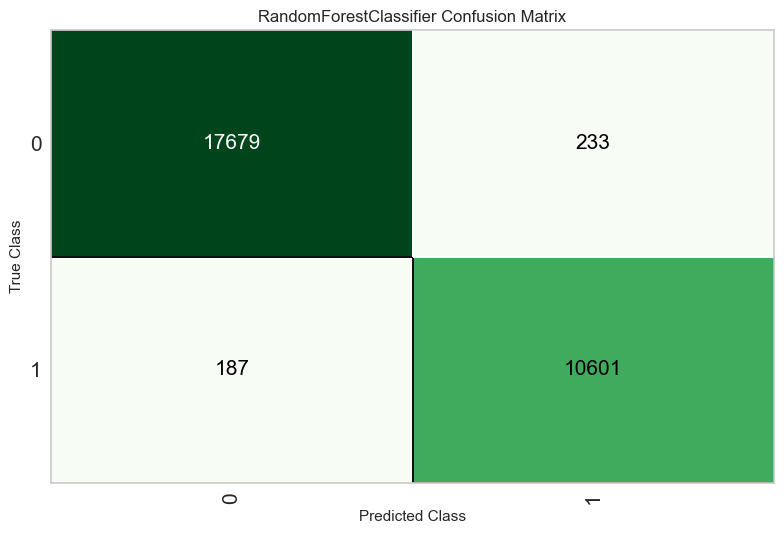

In [452]:
pc_classification.plot_model(mejor_modelo_clasificacion_amp, plot="confusion_matrix")

### **Parece que el mejor modelo para estimar las viviendas ***AMPLIAS*** es un Random Forest cuyos datos están codificados con Frecuency, balanceados con SmotENC y Tomek, y escalados con Standarscaler.**

# **VIVIENDAS GRANDES**

In [453]:
df_sin_outgrandes.head()

,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,...,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,Álava,Municipio_pequeño,De 50.000 habitantes o menos,56.857838,Mayo,2021,Si,Si,3,Propia por compra totalmente pagada,...,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,0
1,Álava,Municipio_pequeño,De 50.000 habitantes o menos,68.459369,Diciembre,2021,Si,Si,4,Propia por compra totalmente pagada,...,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,0
2,Álava,Municipio_pequeño,De 50.000 habitantes o menos,98.588608,Diciembre,2021,Si,No,1,Propia por compra totalmente pagada,...,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,0
3,Álava,Municipio_pequeño,De 50.000 habitantes o menos,93.993815,Diciembre,2021,Si,Si,3,Propia por compra totalmente pagada,...,1,convencional,no tiene renovable,Sin internet,País Vasco,4800,IBI,2147,4.2,0
4,Álava,Municipio_pequeño,De 50.000 habitantes o menos,90.765985,Diciembre,2021,Si,Si,2,Propia por compra con pagos pendientes,...,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,0


### Filtramos las columnas máximas con las que vamos a poder crear un modelo que nos valga teniendo en cuenta los datos de los que disponemos (los de Red Piso)

In [454]:
df_sin_outgrandes.columns

Index(['idq_pv', 'idq_mun', 'tam_muni', 'factor', 'mesent', 'anoent', 'yoresi',
       'otroresi', 'nresi', 'regvi', 'pagovi', 'calefac', 'tipocombcale',
       'tipoagua', 'wc', 'boducha', 'aireacond', 'aislam', 'adaptada',
       'cocina', 'lavadora', 'lavavajillas', 'secadora', 'horno', 'microondas',
       'vitroinduc', 'naseos', 'nsalones', 'ndormito', 'nsototrast',
       'notrashabit', 'metrosvi', 'nvehiculos', 'papel', 'vidrio', 'envases',
       'organico', 'halogena', 'bajoconsumo', 'led', 'servdomes', 'ayudaext',
       'ruidos', 'contamin', 'sucio', 'malcomunic', 'pocoverde',
       'delincuencia', 'molesturist', 'colegio', 'csalud', 'super', 'farmacia',
       'bares', 'cambioresi', 'segunresi', 'lugsegunresi', 'otraccaa',
       'otropais', 'diasusa', 'ingrehog', 'tipoedif', 'tipoedifviv',
       'nplantassob', 'nplantasbajo', 'annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'gastuberia',
       'aguacalcent', 'evacuaguares', 'tipoe

In [455]:
df_sin_outgrandes_fil=df_sin_outgrandes[['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif','annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'aguacalcent', 'ccaa', 'ayudas_ccaa',
       'bonificaciones', 'horas_de_sol', 'radiacion_solar', 'erfotov']]

In [456]:
df_sin_outgrandes_fil.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,Álava,individual,2,3,Más de 180 m2,Unifamiliar,De 1991 a 2000,bueno,Es accesible,No,Si,1,Si,País Vasco,4800,IBI,2147,4.2,0
1,Álava,individual,2,4,Entre 151 y 180 m2,Unifamiliar,De 2001 a 2010,casi perfecto,Es accesible,No,No,No tiene garaje,No,País Vasco,4800,IBI,2147,4.2,0


In [457]:
columnas_categoricas_gra=df_sin_outgrandes_fil.select_dtypes(include=['object', 'category']).columns

In [458]:
columnas_categoricas_gra

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif',
       'annoedifinterv', 'estadoedif', 'accesoedif', 'ascensor', 'garaje',
       'nplazasgar', 'aguacalcent', 'ccaa', 'bonificaciones'],
      dtype='object')

<!-- **AHORA HACIENDO EL ENCODING Y TRATANDO EL DESBALANCEO** -->

In [459]:
b.detectar_orden_cat(df_sin_outgrandes_fil, columnas_categoricas_gra,"erfotov")

Estamos evaluando el orden de la variable IDQ_PV


erfotov,0,1
idq_pv,,
A Coruña,421,4
Albacete,166,2
Alicante,416,14
Almería,201,6
Asturias,317,3
Badajoz,400,3
Baleares,729,50
Barcelona,893,47
Burgos,169,1


La variable idq_pv SI tiene orden porque su p-valor es : 8.036581563614851e-20
Estamos evaluando el orden de la variable CALEFAC


erfotov,0,1
calefac,,
No pero sí aparato que permite calentar alguna habitación (por ejemplo radiadores eléctricos),2612,59
No tiene calefacción,2307,45
colectiva,985,19
individual,11952,361


La variable calefac SI tiene orden porque su p-valor es : 0.004567381935774795
Estamos evaluando el orden de la variable NASEOS


erfotov,0,1
naseos,,
1,1630,15
2,6855,120
3,6658,208
4,2067,106
5,457,25
6,114,3
7,32,3
8,23,2
9,8,1


La variable naseos SI tiene orden porque su p-valor es : 5.61726630831766e-20
Estamos evaluando el orden de la variable NDORMITO


erfotov,0,1
ndormito,,
2,731,17
3,6085,167
4,7179,215
5,2601,51
6,862,16
7,221,12
8,86,2
9,57,2
10,15,1


La variable ndormito SI tiene orden porque su p-valor es : 0.023170694754516063
Estamos evaluando el orden de la variable METROSVI


erfotov,0,1
metrosvi,,
Entre 151 y 180 m2,7478,162
Más de 180 m2,10378,322


La variable metrosvi SI tiene orden porque su p-valor es : 0.00025644970045262576
Estamos evaluando el orden de la variable TIPOEDIF


erfotov,0,1
tipoedif,,
Multifamiliar,2605,25
Unifamiliar,15251,459


La variable tipoedif SI tiene orden porque su p-valor es : 7.881124689005924e-09
Estamos evaluando el orden de la variable ANNOEDIFINTERV


erfotov,0,1
annoedifinterv,,
Anterior a 1900,1666,36
De 1900 a 1920,823,14
De 1921 a 1940,743,12
De 1941 a 1950,545,9
De 1951 a 1960,709,10
De 1961 a 1970,1144,19
De 1971 a 1980,1796,21
De 1981 a 1990,2233,52
De 1991 a 2000,3668,95


La variable annoedifinterv SI tiene orden porque su p-valor es : 2.7225461837511294e-21
Estamos evaluando el orden de la variable ESTADOEDIF


erfotov,0,1
estadoedif,,
bueno,2498,54
casi inhabitable,9,0
casi perfecto,4298,144
inhabitable,18,0
levemente mejorable,550,5
mejorable,41,0
moderadamente bueno,918,6
moderadamente mejorable,119,1
muy bueno,5323,125


La variable estadoedif SI tiene orden porque su p-valor es : 3.5952265140477885e-07
Estamos evaluando el orden de la variable ACCESOEDIF


erfotov,0,1
accesoedif,,
Es accesible,11555,340
No es accesible,6301,144


La variable accesoedif SI tiene orden porque su p-valor es : 0.01355463247018162
Estamos evaluando el orden de la variable ASCENSOR


erfotov,0,1
ascensor,,
No,15763,441
Si,2093,43


La variable ascensor NO tiene orden porque su p-valor es : 0.06457418150713384
Estamos evaluando el orden de la variable GARAJE


erfotov,0,1
garaje,,
No,5006,104
Si,12850,380


La variable garaje SI tiene orden porque su p-valor es : 0.001814298196486438
Estamos evaluando el orden de la variable NPLAZASGAR


erfotov,0,1
nplazasgar,,
1,5009,122
2,4879,186
De 101 a 150,87,1
De 11 a 20,348,3
De 21 a 50,431,7
De 3 a 5,1492,46
De 51 a 100,231,4
De 6 a 10,272,7
Más de 150,101,4


La variable nplazasgar SI tiene orden porque su p-valor es : 1.2774643462174538e-05
Estamos evaluando el orden de la variable AGUACALCENT


erfotov,0,1
aguacalcent,,
No,9284,200
Si,8572,284


La variable aguacalcent SI tiene orden porque su p-valor es : 4.439351052428637e-06
Estamos evaluando el orden de la variable CCAA


erfotov,0,1
ccaa,,
Andalucía,2294,61
Aragón,808,11
Asturias,317,3
Cantabria,441,5
Castilla y León,1544,24
Castilla-La Mancha,1367,16
Cataluña,1601,65
Ceuta,36,0
Comunidad Valenciana,1420,37


La variable ccaa SI tiene orden porque su p-valor es : 1.6486521235496853e-23
Estamos evaluando el orden de la variable BONIFICACIONES


erfotov,0,1
bonificaciones,,
IBI,7190,162
IBI y ICIO,10550,322
Ninguna,116,0


La variable bonificaciones SI tiene orden porque su p-valor es : 0.0015194384054068475


#### CONCLUSIONES SOBRE EL ORDEN:  

**NO ORDENADAS:**   
- ascensor   
    
 *- get- dummies (pandas)*  
 *- One-Hot Encoding (SKlearn) (es más efectivo)*  
 *Ambas te crean tantas columnas como categorias hay en la columna y hace que en esa solo valga 1 las que coincidan y 0 el resto*


**ORDENADAS:**  
- calefac 
- naseos  
- metrosvi  
- tipoedif  
- annoedifinterv  
- idq_pv  
- ndormito  
- estadoedif   
- accesoedif  
- garaje  
- nplazasgar  
- bonificaciones  
- aguacalcent  
- ccaa  
  

*- Ordinal Encoding  (Los codifica en función de los pesos que le digamos)*  
*- Label Encoding (Los codifica en orden alfabetico)*  
*- Target Encoding (Los codifica en funcion de las medias (osea en función de la relación con la variable dependiente))*  
*- Frequency Encoding (Los codifica en funcion de la frecuencia(en función del value_counts))*  



OPTO POR UN FREQUENCY

In [460]:
diccionario_encoding_gra = {"onehot": ["ascensor"], 
                        "dummies": [], # no metemos ninguna
                        'ordinal' : { }, #no metemos ninguna
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": ["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"], 
                        "target": ["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"]  
                        }

In [461]:
encoding_gra=b.Encoding(df_sin_outgrandes_fil, diccionario_encoding_gra, "erfotov")
encoded_gra=encoding_gra.frequency_encoding()

In [462]:
encoded_gra.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.00578,0.671374,0.380316,0.340894,0.583424,0.856598,0.205180,0.139149,0.648582,0.883533,0.721374,0.279771,0.482879,0.022192,4800,0.400872,2147,4.2,0
1,0.00578,0.671374,0.380316,0.403162,0.416576,0.856598,0.221810,0.242203,0.648582,0.883533,0.278626,0.278626,0.517121,0.022192,4800,0.400872,2147,4.2,0
2,0.00578,0.671374,0.380316,0.403162,0.416576,0.856598,0.124591,0.297056,0.648582,0.883533,0.721374,0.279771,0.517121,0.022192,4800,0.400872,2147,4.2,0
3,0.00578,0.671374,0.118484,0.047874,0.583424,0.856598,0.092803,0.229771,0.648582,0.883533,0.278626,0.278626,0.482879,0.022192,4800,0.400872,2147,4.2,0
4,0.00578,0.671374,0.374373,0.340894,0.416576,0.856598,0.221810,0.229771,0.648582,0.883533,0.721374,0.279771,0.482879,0.022192,4800,0.400872,2147,4.2,0


**AHORA HACIENDO LA ESTANDARIZACIÓN**

In [463]:
scaler_gra=RobustScaler()
nums_gra=encoded_gra.select_dtypes(include=np.number)
nums_gra.drop(columns="erfotov", inplace=True)
nums_gra.drop(columns=columnas_categoricas_gra, inplace=True)
cols_num_gra=nums_gra.columns
dfa_gra=scaler_gra.fit_transform(nums_gra)
df_gra=pd.DataFrame(dfa_gra, columns=cols_num_gra)
encoded_gra[cols_num_gra]= df_gra

In [464]:
encoded_gra.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.00578,0.671374,0.380316,0.340894,0.583424,0.856598,0.205180,0.139149,0.648582,0.883533,0.721374,0.279771,0.482879,0.022192,0.533333,0.400872,-1.276481,-2.238095,0
1,0.00578,0.671374,0.380316,0.403162,0.416576,0.856598,0.221810,0.242203,0.648582,0.883533,0.278626,0.278626,0.517121,0.022192,0.533333,0.400872,-1.276481,-2.238095,0
2,0.00578,0.671374,0.380316,0.403162,0.416576,0.856598,0.124591,0.297056,0.648582,0.883533,0.721374,0.279771,0.517121,0.022192,0.533333,0.400872,-1.276481,-2.238095,0
3,0.00578,0.671374,0.118484,0.047874,0.583424,0.856598,0.092803,0.229771,0.648582,0.883533,0.278626,0.278626,0.482879,0.022192,0.533333,0.400872,-1.276481,-2.238095,0
4,0.00578,0.671374,0.374373,0.340894,0.416576,0.856598,0.221810,0.229771,0.648582,0.883533,0.721374,0.279771,0.482879,0.022192,0.533333,0.400872,-1.276481,-2.238095,0


AHORA EL DESBALANCEO

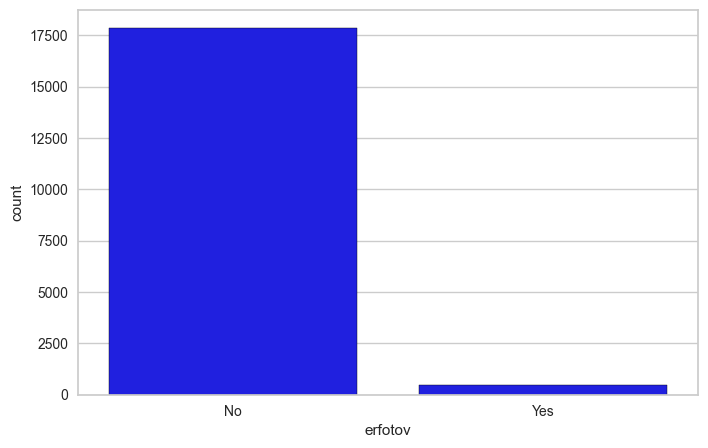

In [465]:
desbalanceo_gra=b.Desbalanceo(encoded_gra,"erfotov")
desbalanceo_gra.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN TOMEKLINK**

-  Elimina pares de muestras cercanas entre la clase mayoritaria y la clase minoritaria donde el vecino más cercano de un punto de la clase minoritaria pertenece a la clase mayoritaria.

In [466]:
encoded_gra.shape

(18340, 19)

In [467]:
balanced_tomek_gra=desbalanceo_gra.balancear_clases_tomek()

In [468]:
balanced_tomek_gra.shape

(18092, 19)

In [469]:
balanced_tomek_gra.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.00578,0.671374,0.380316,0.340894,0.583424,0.856598,0.20518,0.139149,0.648582,0.883533,0.721374,0.279771,0.482879,0.022192,0.533333,0.400872,-1.276481,-2.238095,0
1,0.00578,0.671374,0.380316,0.403162,0.416576,0.856598,0.22181,0.242203,0.648582,0.883533,0.278626,0.278626,0.517121,0.022192,0.533333,0.400872,-1.276481,-2.238095,0


In [470]:
round(balanced_tomek_gra["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    97.32
1     2.68
Name: proportion, dtype: float64

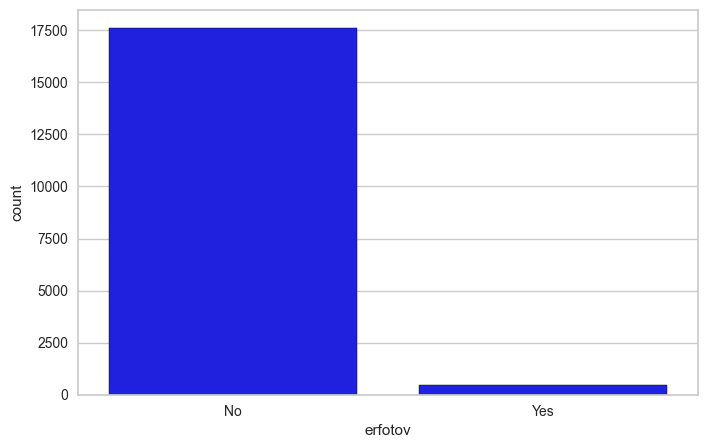

In [471]:
desbalanceo2_gra=b.Desbalanceo(balanced_tomek_gra,"erfotov")
desbalanceo2_gra.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN SMOTENC PARA QUE NO TOQUE LAS CATEGORICAS**

In [472]:
columnas_son_cat_encoded_gra=["calefac", "naseos", "metrosvi","tipoedif", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "garaje", "nplazasgar", "bonificaciones"]

In [473]:
balanced_tomek_gra.shape

(18092, 19)

In [474]:
encoded_gra.columns

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'tipoedif',
       'annoedifinterv', 'estadoedif', 'accesoedif', 'ascensor', 'garaje',
       'nplazasgar', 'aguacalcent', 'ccaa', 'ayudas_ccaa', 'bonificaciones',
       'horas_de_sol', 'radiacion_solar', 'erfotov'],
      dtype='object')

In [475]:
df_balanceado_smote_gra=desbalanceo2_gra.balancear_clase_smotenc(columnas_son_cat_encoded_gra, sampling_strategy=0.6)

In [476]:
df_balanceado_smote_gra.head(3)

,idq_pv,calefac,naseos,ndormito,metrosvi,tipoedif,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,0.00578,0.671374,0.380316,0.340894,0.583424,0.856598,0.205180,0.139149,0.648582,0.883533,0.721374,0.279771,0.482879,0.022192,0.533333,0.400872,-1.276481,-2.238095,0
1,0.00578,0.671374,0.380316,0.403162,0.416576,0.856598,0.221810,0.242203,0.648582,0.883533,0.278626,0.278626,0.517121,0.022192,0.533333,0.400872,-1.276481,-2.238095,0
2,0.00578,0.671374,0.380316,0.403162,0.416576,0.856598,0.124591,0.297056,0.648582,0.883533,0.721374,0.279771,0.517121,0.022192,0.533333,0.400872,-1.276481,-2.238095,0


In [477]:
round(df_balanceado_smote_gra["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.5
1    37.5
Name: proportion, dtype: float64

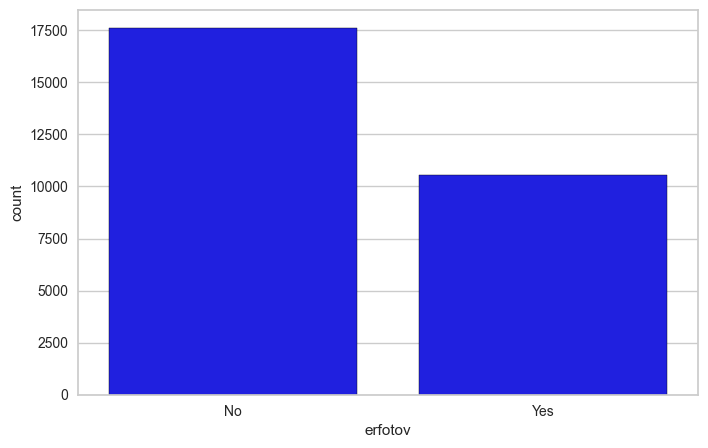

In [478]:
desbalanceo3_gra=b.Desbalanceo(df_balanceado_smote_gra,"erfotov")
desbalanceo3_gra.visualizar_clase(color="blue", edgecolor="black")

In [479]:
df_balanceado_smote_gra["erfotov"].unique()

array([0, 1], dtype=int64)

In [480]:
df_balanceado_smote_gra.shape

(28172, 19)

In [481]:
balanced_tomek2_gra=desbalanceo3_gra.balancear_clases_tomek()

In [482]:
balanced_tomek2_gra.shape

(28048, 19)

In [483]:
round(balanced_tomek2_gra["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.34
1    37.66
Name: proportion, dtype: float64

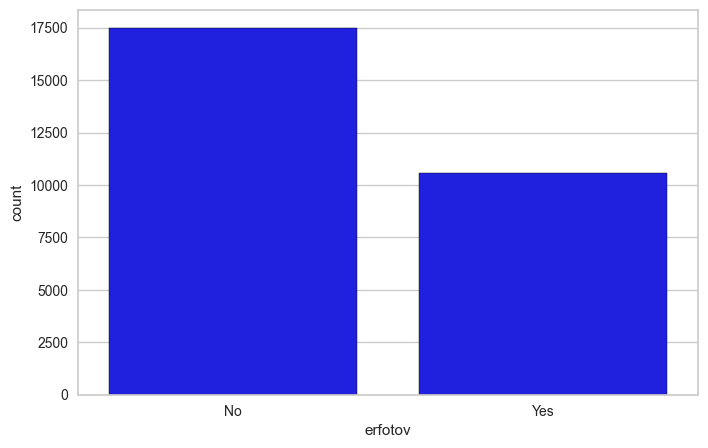

In [484]:
desbalanceo4_gra=b.Desbalanceo(balanced_tomek2_gra,"erfotov")
desbalanceo4_gra.visualizar_clase(color="blue", edgecolor="black")

Uso el primer Tomek para reducir un poco la mayoritaria (No demasiado he de decir) y hacer los "márgenes más claros entre las clases. Luego uso el Smotenc que me hace un upsampling y finalmente uso un tomek de nuevo para volver a marcar bien las clases tras haber generado datos con el smotenc.

In [485]:
clas_gra= pc_classification.setup(data=balanced_tomek2_gra,
                              target="erfotov",
                              normalize=True,
                              session_id=42,
                              remove_multicollinearity=True,
                              fold=10,
                              transformation=True,
                              categorical_features=columnas_categoricas_gra.tolist())

mejor_modelo_clasificacion_gra= pc_classification.compare_models()

,Description,Value
0,Session id,42
1,Target,erfotov
2,Target type,Binary
3,Original data shape,"(28048, 19)"
4,Transformed data shape,"(28048, 90)"
5,Transformed train set shape,"(19633, 90)"
6,Transformed test set shape,"(8415, 90)"
7,Numeric features,3
8,Categorical features,15
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9681,0.9851,0.9569,0.9583,0.9576,0.9320,0.9320,1.8790
rf,Random Forest Classifier,0.9679,0.9875,0.9597,0.9552,0.9574,0.9316,0.9316,1.7680
dt,Decision Tree Classifier,0.9363,0.9410,0.9477,0.8905,0.9181,0.8661,0.8673,1.0270
lightgbm,Light Gradient Boosting Machine,0.9330,0.9753,0.9401,0.8886,0.9136,0.8589,0.8599,1.3260
knn,K Neighbors Classifier,0.9081,0.9618,0.9605,0.8246,0.8873,0.8105,0.8173,1.2880
gbc,Gradient Boosting Classifier,0.8456,0.9215,0.7936,0.7963,0.7948,0.6710,0.6712,2.2680
lr,Logistic Regression,0.8049,0.8875,0.7470,0.7383,0.7425,0.5855,0.5856,1.0600
ada,Ada Boost Classifier,0.8027,0.8828,0.7458,0.7348,0.7401,0.5811,0.5813,1.4670
svm,SVM - Linear Kernel,0.7996,0.8741,0.7466,0.7288,0.7371,0.5753,0.5759,1.0930
ridge,Ridge Classifier,0.7982,0.8804,0.7375,0.7299,0.7336,0.5712,0.5713,0.9760


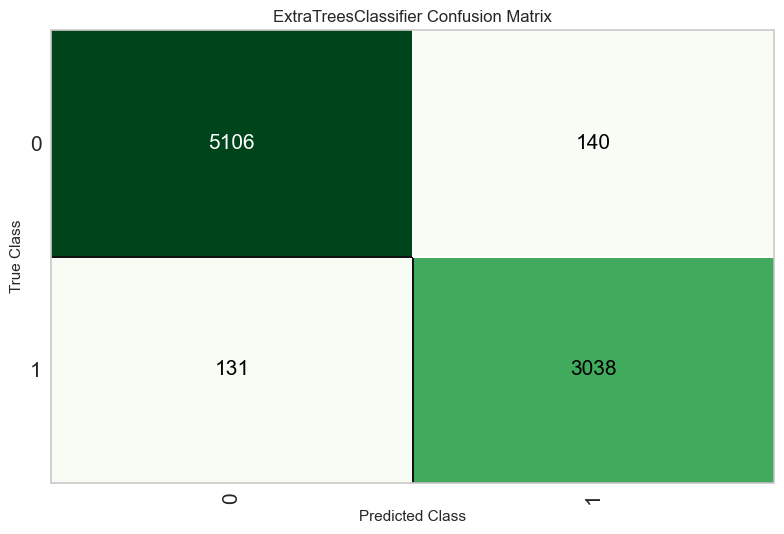

In [486]:
pc_classification.plot_model(mejor_modelo_clasificacion_gra, plot="confusion_matrix")

### **Parece que el mejor modelo para estimar las viviendas ***GRANDES*** es el Extra Trees Classifier sin embargo el Random Forest paraece tener también un buen desempeño con lo que será el que usaremos cuyos datos están codificados con Frecuency, balanceados con SmotENC y Tomek, y escalados con Robustscaler.**